In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import imutils
from imutils import paths
from PIL import Image
from feature_extractor import FeatureExtractor
from pathlib import Path
import cv2

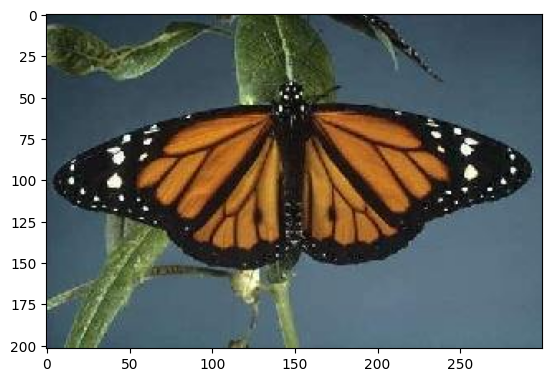

In [7]:
image1 = Image.open("Objects/butterfly/image_0015.jpg") #butterfly
#image1.show()
plt.imshow(image1)

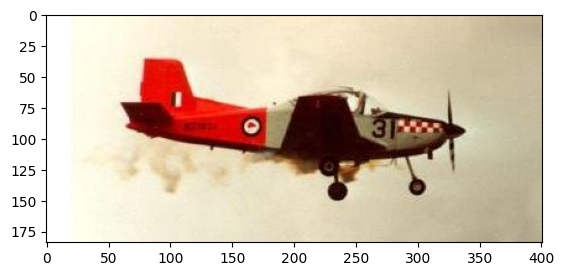

In [10]:
image2 = Image.open('Objects/airplanes/image_0002.jpg')
plt.imshow(image2)

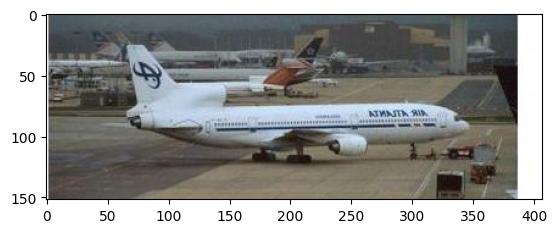

In [11]:
image3 = Image.open('Objects/airplanes/image_0273.jpg')
plt.imshow(image3)

In [ ]:
fe = FeatureExtractor()
feature1 = fe.extract(img=image1)
feature2 = fe.extract(img=image2)
feature3 = fe.extract(img=image3)

In [7]:
dist12 = np.linalg.norm(feature1-feature2, axis=None)  # L2 distances to features
dist12

1.2533871

In [8]:
dist13 = np.linalg.norm(feature1-feature3, axis=None)  # L2 distances to features
dist13

1.321859

In [9]:
dist23 = np.linalg.norm(feature2-feature3, axis=None)  # L2 distances to features
dist23

1.1129571

In [ ]:
imagePaths = list(paths.list_images('test'))

In [11]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [12]:
i=0
dlist=[]
for (i, imagePath) in enumerate(imagePaths):
    # load the input image
    print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
    imagedb = Image.open(imagePath)
    featuredb = fe.extract(img=imagedb)
    d = np.linalg.norm(featuredb-feature1, axis=None)
    dlist.append((d,imagePath))
    

[INFO] processing image 1/61
[INFO] processing image 2/61
[INFO] processing image 3/61
[INFO] processing image 4/61
[INFO] processing image 5/61
[INFO] processing image 6/61
[INFO] processing image 7/61
[INFO] processing image 8/61
[INFO] processing image 9/61
[INFO] processing image 10/61
[INFO] processing image 11/61
[INFO] processing image 12/61
[INFO] processing image 13/61
[INFO] processing image 14/61
[INFO] processing image 15/61
[INFO] processing image 16/61
[INFO] processing image 17/61
[INFO] processing image 18/61
[INFO] processing image 19/61
[INFO] processing image 20/61
[INFO] processing image 21/61
[INFO] processing image 22/61
[INFO] processing image 23/61
[INFO] processing image 24/61
[INFO] processing image 25/61
[INFO] processing image 26/61
[INFO] processing image 27/61
[INFO] processing image 28/61
[INFO] processing image 29/61
[INFO] processing image 30/61
[INFO] processing image 31/61
[INFO] processing image 32/61
[INFO] processing image 33/61
[INFO] processing i

In [13]:
dlist.sort(key=lambda x: x[0])

In [14]:
dresult=[]
for i in range(0,8):
    dresult.append(dlist[i][0])

In [15]:
imresult=[]
for i in range(0,8):
    image = cv2.imread(dlist[i][1])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imresult.append(image)

In [ ]:
show_images(imresult,8,dresult)